In [1]:
from algoneer_datasets.bike_sharing import load_dataset
ds = load_dataset()
df = ds.df

In [2]:
from algoneer_datasets.bike_sharing.algorithms import get_algorithm

In [20]:
# we initialize a random forest regressor
algo = get_algorithm('random-forest')

In [21]:
model = algo.fit(ds)

In [22]:
# we make sure this model is a regressor
model.algorithm.is_regressor

True

In [23]:
from algoneer.methods.blackbox.ale import ALE

ale = ALE()

In [24]:
result = ale.run(model, ds, n_intervals=40, max_datapoints=1000)

[ALE]: unknown attribute type for column 'instant', skipping...
[ALE]: unknown attribute type for column 'dteday', skipping...
[ALE]: unknown attribute type for column 'yr', skipping...
[ALE]: unknown attribute type for column 'mnth', skipping...
[ALE]: unknown attribute type for column 'holiday', skipping...
[ALE]: unknown attribute type for column 'weekday', skipping...
[ALE]: unknown attribute type for column 'workingday', skipping...
[ALE]: unknown attribute type for column 'casual', skipping...
[ALE]: unknown attribute type for column 'registered', skipping...
[ALE]: unknown attribute type for column 'cnt', skipping...


In [25]:
%matplotlib inline
import matplotlib.pylab as pl

Text(0.5, 0, 'humidity [%]')

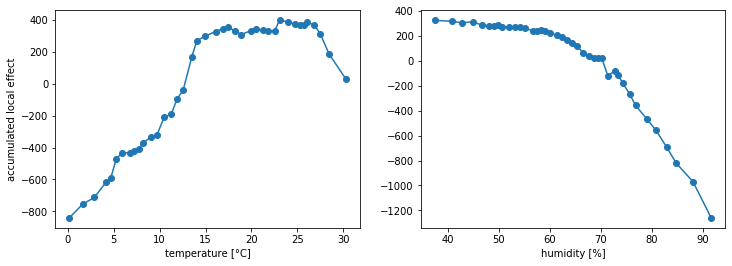

In [34]:
pl.figure(figsize=(12,4))
pl.subplot(121)
k = 'temp'
pl.plot([v[1]*47-8 for v in result[k]], [v[2] for v in result[k]],marker='o')
pl.xlabel("temperature [°C]")
pl.ylabel("accumulated local effect")
pl.subplot(122)
k = 'hum'
pl.plot([v[1]*100 for v in result[k]], [v[2] for v in result[k]],marker='o')
pl.xlabel("humidity [%]")